In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from scipy.cluster.hierarchy import linkage, dendrogram
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews_data = pd.read_csv("C:/Users/Nirmal/Documents/Python Scripts/EV_2-wheeler_Reviews.csv")
reviews_data

,Review,Used it for,Owned for,Ridden for,Rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,0 kms,1,3,4,0,0,4,1,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3,1,0,1,3,3,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4,4,0,2,5,2,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1,1,0,1,1,1,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3,4,0,1,3,2,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...
831,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2,2,0,2,2,3,Gemopai Ryder
832,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5,5,5,5,0,0,Gemopai Ryder
833,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2,2,4,2,0,0,Gemopai Ryder
834,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4,4,0,0,4,5,Gemopai Ryder


In [3]:
reviews_data = reviews_data.drop(["Used it for", "Owned for", "Ridden for"], axis=1)
reviews_data

,Review,Rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,1,3,4,0,0,4,1,TVS iQube
1,Performance is very poor on this bike. The cha...,1,3,1,0,1,3,3,TVS iQube
2,I purchased this in April 2022 and the sales s...,3,4,4,0,2,5,2,TVS iQube
3,If any issues come in scooty parts not availab...,1,1,1,0,1,1,1,TVS iQube
4,Don't buy this vehicle unless you have a near ...,1,3,4,0,1,3,2,TVS iQube
...,...,...,...,...,...,...,...,...,...
831,Scooty is ok but 250 motor power is less. So t...,2,2,2,0,2,2,3,Gemopai Ryder
832,"Superb scooty. good look, Many color options ....",5,5,5,5,5,0,0,Gemopai Ryder
833,"Up to 2 years the condition was good,\nAfter 2...",2,2,2,4,2,0,0,Gemopai Ryder
834,"Compare to other scooters it is a best bike, c...",5,4,4,0,0,4,5,Gemopai Ryder


In [4]:
reviews_data.isnull().sum()

Review                40
Rating                 0
Visual Appeal          0
Reliability            0
Performance            0
Service Experience     0
Comfort                0
Value for Money        0
Model Name             0
dtype: int64

In [5]:
reviews_data = reviews_data.dropna(subset=['Review'])
reviews_data

,Review,Rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,1,3,4,0,0,4,1,TVS iQube
1,Performance is very poor on this bike. The cha...,1,3,1,0,1,3,3,TVS iQube
2,I purchased this in April 2022 and the sales s...,3,4,4,0,2,5,2,TVS iQube
3,If any issues come in scooty parts not availab...,1,1,1,0,1,1,1,TVS iQube
4,Don't buy this vehicle unless you have a near ...,1,3,4,0,1,3,2,TVS iQube
...,...,...,...,...,...,...,...,...,...
831,Scooty is ok but 250 motor power is less. So t...,2,2,2,0,2,2,3,Gemopai Ryder
832,"Superb scooty. good look, Many color options ....",5,5,5,5,5,0,0,Gemopai Ryder
833,"Up to 2 years the condition was good,\nAfter 2...",2,2,2,4,2,0,0,Gemopai Ryder
834,"Compare to other scooters it is a best bike, c...",5,4,4,0,0,4,5,Gemopai Ryder


In [6]:
perception_vars = reviews_data.columns[2:8]
formula = 'Rating ~ ' + ' + '.join(perception_vars)
print(formula)

Rating ~ Visual Appeal + Reliability + Performance + Service Experience + Comfort + Value for Money


In [7]:
X = reviews_data[perception_vars]
y = reviews_data['Rating']

In [8]:
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(X)

for cluster in range(2):
    X_cluster = X[clusters == cluster]
    y_cluster = y[clusters == cluster]
    
    X_cluster = sm.add_constant(X_cluster)
    
    model = sm.OLS(y_cluster, X_cluster).fit()
    
    print(f"\nCluster {cluster + 1} Regression Model Summary:")
    print(model.summary())


Cluster 1 Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     36.77
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           4.05e-30
Time:                        01:26:14   Log-Likelihood:                -615.44
No. Observations:                 348   AIC:                             1243.
Df Residuals:                     342   BIC:                             1266.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

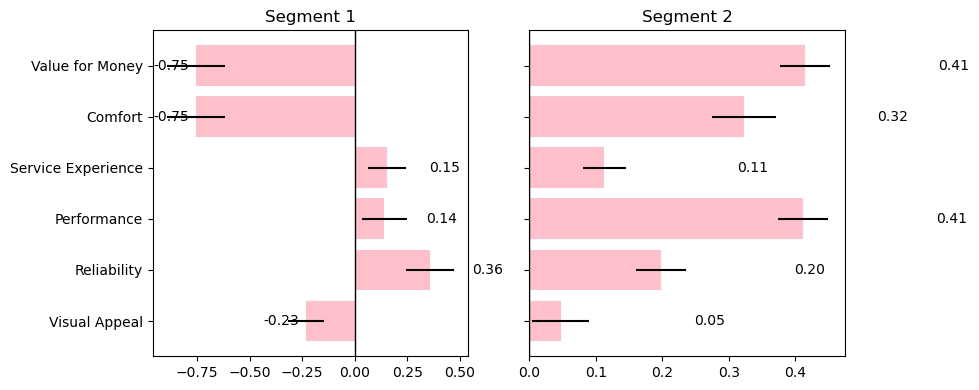

In [9]:
cluster1 = {
    'Variable': ['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money'],
    'Coefficient': [-0.2327,  0.3557,  0.1409, 0.1525, -0.7549, -0.7549],
    'Std_Err': [0.084,  0.114,  0.109, 0.090, 0.137, 0.137]
}

data_cluster1 = pd.DataFrame(cluster1)

cluster2 = {
    'Variable': ['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money'],
    'Coefficient': [0.0472,  0.1978, 0.4111, 0.1129, 0.3232,  0.4144],
    'Std_Err': [0.043, 0.037, 0.038, 0.032, 0.048,  0.037]
}

data_cluster2 = pd.DataFrame(cluster2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].barh(data_cluster1['Variable'], data_cluster1['Coefficient'], xerr=data_cluster1['Std_Err'], color='pink')
axs[0].set_title('Segment 1')
axs[0].axvline(0, color='black', linewidth=1)
for i, coef in enumerate(data_cluster1['Coefficient']):
    axs[0].text(coef + (0.2 if coef > 0 else -0.2), i, f'{coef:.2f}', va='center')

axs[1].barh(data_cluster2['Variable'], data_cluster2['Coefficient'], xerr=data_cluster2['Std_Err'], color='pink')
axs[1].set_title('Segment 2')
axs[1].axvline(0, color='black', linewidth=1)
for i, coef in enumerate(data_cluster2['Coefficient']):
    axs[1].text(coef + (0.2 if coef > 0 else -0.2), i, f'{coef:.2f}', va='center')

plt.tight_layout()
plt.show()

In [10]:
senti_analysis = SentimentIntensityAnalyzer()
senti_analysis.polarity_scores(reviews_data.iloc[50,0])

{'neg': 0.03, 'neu': 0.83, 'pos': 0.14, 'compound': 0.8268}

In [11]:
reviews_data["Score"] = reviews_data["Review"].apply(lambda x:senti_analysis.polarity_scores(x))
reviews_data["Compound_Score"] = reviews_data["Score"].apply(lambda x:x["compound"]) 

In [12]:
reviews_data["Comment"] = reviews_data["Compound_Score"].apply(lambda x:np.where(x>0,"Positive","Negative"))
reviews_data["Comment"].value_counts()

Comment
Positive    532
Negative    264
Name: count, dtype: int64

In [13]:
reviews_data

,Review,Rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Score,Compound_Score,Comment
0,We all checked the bike's capacity to be 150 k...,1,3,4,0,0,4,1,TVS iQube,"{'neg': 0.203, 'neu': 0.724, 'pos': 0.074, 'co...",-0.8750,Negative
1,Performance is very poor on this bike. The cha...,1,3,1,0,1,3,3,TVS iQube,"{'neg': 0.146, 'neu': 0.801, 'pos': 0.053, 'co...",-0.7919,Negative
2,I purchased this in April 2022 and the sales s...,3,4,4,0,2,5,2,TVS iQube,"{'neg': 0.038, 'neu': 0.827, 'pos': 0.135, 'co...",0.9079,Positive
3,If any issues come in scooty parts not availab...,1,1,1,0,1,1,1,TVS iQube,"{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'comp...",-0.4019,Negative
4,Don't buy this vehicle unless you have a near ...,1,3,4,0,1,3,2,TVS iQube,"{'neg': 0.1, 'neu': 0.864, 'pos': 0.036, 'comp...",-0.5719,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
831,Scooty is ok but 250 motor power is less. So t...,2,2,2,0,2,2,3,Gemopai Ryder,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.6177,Positive
832,"Superb scooty. good look, Many color options ....",5,5,5,5,5,0,0,Gemopai Ryder,"{'neg': 0.063, 'neu': 0.676, 'pos': 0.26, 'com...",0.9286,Positive
833,"Up to 2 years the condition was good,\nAfter 2...",2,2,2,4,2,0,0,Gemopai Ryder,"{'neg': 0.103, 'neu': 0.818, 'pos': 0.079, 'co...",-0.1531,Negative
834,"Compare to other scooters it is a best bike, c...",5,4,4,0,0,4,5,Gemopai Ryder,"{'neg': 0.034, 'neu': 0.795, 'pos': 0.171, 'co...",0.8750,Positive


In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
reviews_data['Segment'] = kmeans.fit_predict(X)

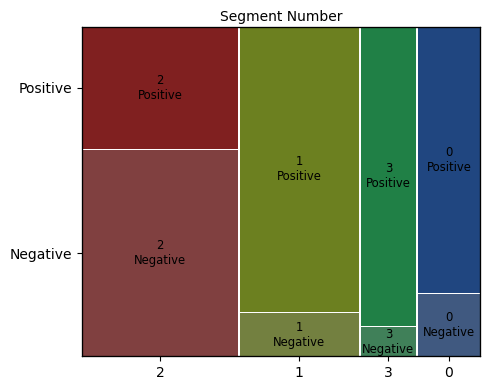

In [15]:
plt.rcParams["figure.figsize"] = [5.00, 4.00]
plt.rcParams["figure.autolayout"] = True
mosaic(reviews_data, ['Segment', 'Comment'])
plt.xlabel('Segment Number')
plt.ylabel('Comment')
plt.title('')
plt.show()

In [16]:
negative_reviews = reviews_data[reviews_data["Comment"] == "Negative"]
negative_reviews

,Review,Rating,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Score,Compound_Score,Comment,Segment
0,We all checked the bike's capacity to be 150 k...,1,3,4,0,0,4,1,TVS iQube,"{'neg': 0.203, 'neu': 0.724, 'pos': 0.074, 'co...",-0.8750,Negative,2
1,Performance is very poor on this bike. The cha...,1,3,1,0,1,3,3,TVS iQube,"{'neg': 0.146, 'neu': 0.801, 'pos': 0.053, 'co...",-0.7919,Negative,2
3,If any issues come in scooty parts not availab...,1,1,1,0,1,1,1,TVS iQube,"{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'comp...",-0.4019,Negative,2
4,Don't buy this vehicle unless you have a near ...,1,3,4,0,1,3,2,TVS iQube,"{'neg': 0.1, 'neu': 0.864, 'pos': 0.036, 'comp...",-0.5719,Negative,1
5,First 7k kms no issues.\nLater rear wheel had ...,1,5,1,0,1,5,2,TVS iQube,"{'neg': 0.061, 'neu': 0.939, 'pos': 0.0, 'comp...",-0.6597,Negative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,"Worst scooter, worst company, never buy this p...",1,1,1,1,1,0,0,Techo Electra Emerge,"{'neg': 0.243, 'neu': 0.724, 'pos': 0.033, 'co...",-0.9705,Negative,2
819,Very worst scooter mcb heating and wires melti...,1,3,1,0,1,2,1,Techo Electra Raptor,"{'neg': 0.29, 'neu': 0.686, 'pos': 0.024, 'com...",-0.9594,Negative,2
821,I brought this about 2 year back. usage are le...,1,3,1,0,1,1,2,Techo Electra Raptor,"{'neg': 0.161, 'neu': 0.818, 'pos': 0.021, 'co...",-0.9137,Negative,2
822,Purchased on april 2019. After 3 month lock go...,3,4,1,0,1,3,1,Techo Electra Raptor,"{'neg': 0.099, 'neu': 0.843, 'pos': 0.058, 'co...",-0.5106,Negative,2


In [17]:
negative_reviews_text = ' '.join(negative_reviews['Review'])

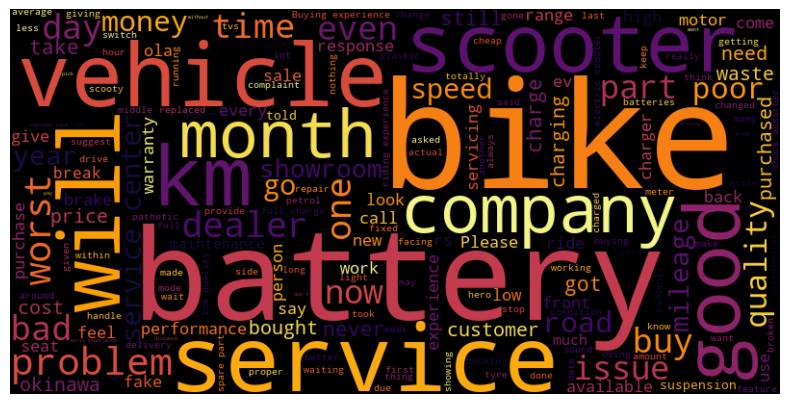

In [18]:
wordcloud = WordCloud(width=800, height=400, stopwords= STOPWORDS, background_color='black', colormap="inferno").generate(negative_reviews_text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()